Código Fonte gerado pelo Joison Rego joilson.rego@ufrn.br 

In [1]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pywt
import os
from pathlib import Path

base_path = Path().resolve().parents[1]

# === FILES ===
audio_file = base_path / "data" / "llb11_00249_2018_05_05_06_01_31.wav"

# === PARAMETERS ===
n_fft = 1024
hop_length = 256
wavelet_name = 'morl'
#scales = np.arange(1, 128)
scales = np.logspace(0, np.log10(128), num=128)

print(f"Processing: {os.path.basename(audio_file)}")

# Load
y, sr = librosa.load(audio_file, sr=None)
duration = len(y) / sr
print(f"Sample rate: {sr}, Duration: {duration:.2f} seconds")

Processing: llb11_00249_2018_05_05_06_01_31.wav
Sample rate: 44100, Duration: 18.72 seconds


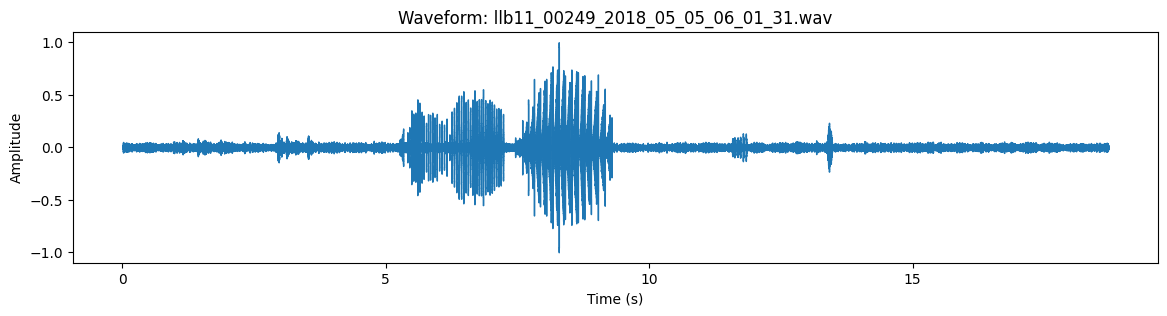

In [2]:


# === PLOT WAVEFORM ===
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform: {os.path.basename(audio_file)}")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


STFT shape: (513, 3226)


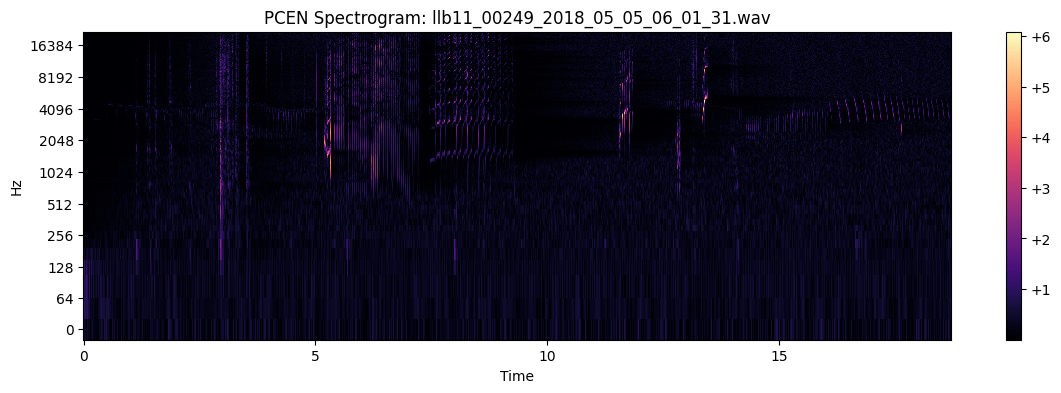

In [3]:

# === STFT + PCEN Spectrogram ===
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window='hann'))
print(f"STFT shape: {S.shape}")

# Apply PCEN to the *magnitude* spectrogram
pcen_spectrogram = librosa.pcen(S, sr=sr, hop_length=hop_length)

plt.figure(figsize=(14, 4))
librosa.display.specshow(
    pcen_spectrogram,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='log',
    cmap='magma'
)
plt.colorbar(format='%+2.0f')
plt.title(f"PCEN Spectrogram: {os.path.basename(audio_file)}")
plt.show()


Computing Wavelet Transform (this can take time)...
Wavelet frequencies: 279.93 Hz to 35831.25 Hz


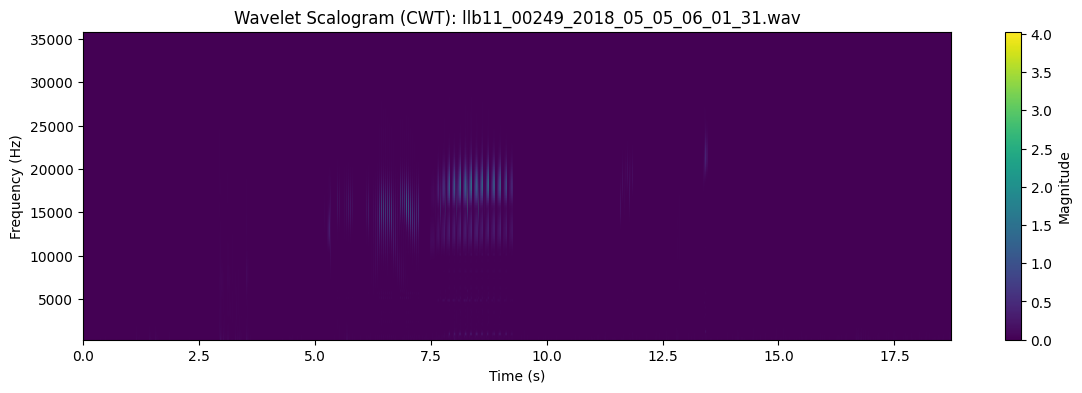

In [4]:

# === Wavelet Scalogram ===
print("Computing Wavelet Transform (this can take time)...")
coeffs, freqs = pywt.cwt(y, scales, wavelet_name, sampling_period=1/sr)
print(f"Wavelet frequencies: {freqs.min():.2f} Hz to {freqs.max():.2f} Hz")

plt.figure(figsize=(14, 4))
plt.imshow(
    np.abs(coeffs),
    extent=[0, duration, freqs[-1], freqs[0]],
    cmap='viridis',
    aspect='auto'
)
plt.colorbar(label='Magnitude')
plt.title(f"Wavelet Scalogram (CWT): {os.path.basename(audio_file)}")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

print("\n" + "="*60 + "\n")
